<a href="https://colab.research.google.com/github/rkdwogns/TIS/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
# 패션 MNIST 데이터 적재 및 훈련/검증 세트로 분리

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# 모델을 만드는 간단한 함수 정의
# 은닉층을 추가할 수 있는 구조 

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
model = model_fn()

# 모델구조 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# fit() 메서드의 결과를 history 변수에 저장
# verbose=0: 훈련과정이 나타나지 않음
# 기본값=1 (진행막대와 함께 손실 등의 지표 출력)
# 2로 바꾸면 진행 막대를 빼고 출력
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [6]:
# history 객체에는 훈련 측정값이 담겨있는 history 딕셔너리가 들어 있음

print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [11]:
# 연습문제
# 다음 딕셔너리에서 key1 값을 추출해 보시오.
dict1 = {'key1': 100, 'key2': 200}
print(dict1['key1'])

100


In [12]:
print(history.history['loss'])

[0.5311374068260193, 0.39091381430625916, 0.35448068380355835, 0.33128589391708374, 0.31468212604522705]


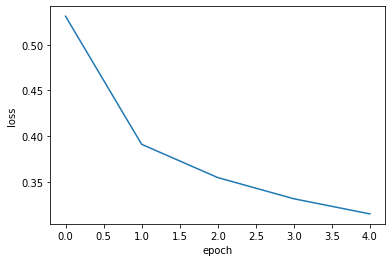

In [13]:
# history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트
# 손실 그래프

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

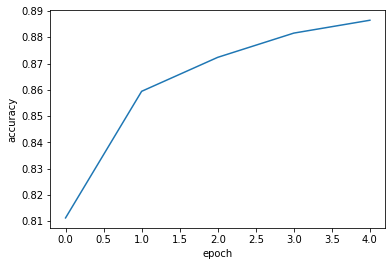

In [14]:
# 정확도 그래프

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [15]:
# 에포크를 20으로 늘림

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

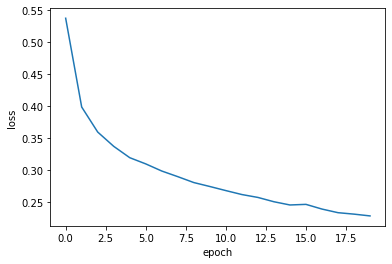

In [16]:
# 손실 그래프

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [17]:
# 검증 손실 계산
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [18]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


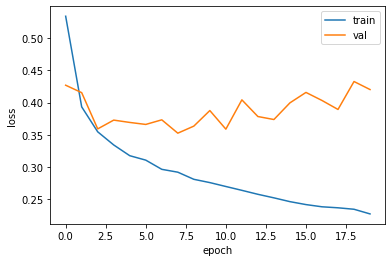

In [19]:
# 훈련손실과 검증손실을 한 그래프에 그려 과대/과소 적합 문제를 조사

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [20]:
# Adam 옵티마이저 적용

model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

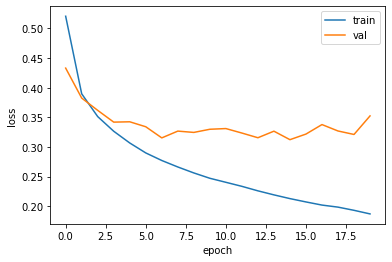

In [21]:
# 훈련손실 및 검증손실 그리기

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [22]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

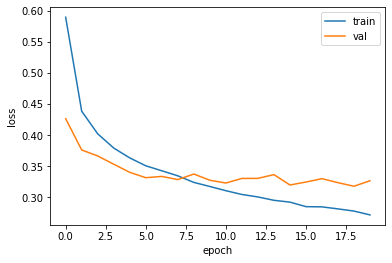

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [26]:
# 모델의 파라미터(가중치)만 저장: 용량이 작다
model.save_weights('model-weights.h5')

In [27]:
# 모델 구조와 모델 파라미터를 합계 저장
model.save('model-whole.h5')

In [28]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Mar  6 06:20 model-weights.h5
-rw-r--r-- 1 root root 981360 Mar  6 06:20 model-whole.h5


In [29]:
# 모델 먼저 생성
model = model_fn(keras.layers.Dropout(0.3))

# (남의 모델 등) 저장된 파라미터를 불러올 때
model.load_weights('model-weights.h5')

In [30]:
import numpy as np

# predict()는 샘플마다 각 클래스에 대한 확률을 반환
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target)) # 이 값의 의미? 검증세트 기준 모형의 정확도

375/375 [==============================] - 3s 6ms/step
0.8798333333333334


In [31]:
# (남의 모델 등) 모델 자체를 불러올 때
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 5ms/step - loss: 0.3359 - accuracy: 0.8798


[0.3358705937862396, 0.8798333406448364]

In [32]:
# 콜백
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [33]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3210 - accuracy: 0.8885


[0.3210257887840271, 0.8884999752044678]

In [34]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# 조기종료(early stopping)는 과적합이 시작 되기 전 미리 훈련을 종료하는 것
# 예를 들어, patience=2로 지정하면 2번 연속 검증되지 않으면 훈련을 중지
# restore_best_weights=True: 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [35]:
# 몇 번째 에포크에서 훈련이 중단되었는 지 표시
print(early_stopping_cb.stopped_epoch)

10


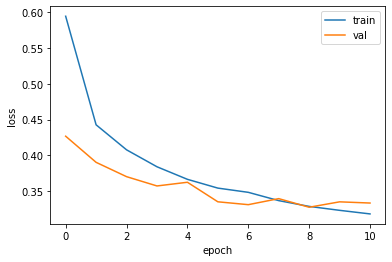

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [37]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 6ms/step - loss: 0.3276 - accuracy: 0.8817


[0.3275802731513977, 0.8816666603088379]